# Data Preprocessing for Enedis Challenge

This notebook handles the initial data loading and cleaning steps.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Loading datasets 

For **X_train** :

Each column = a sensor, network point, or aggregate  
The IDs are anonymized (hash)  
The values = aggregated power or energy  
(often in kW or kWh over 30 min)  

Basically, it gives us the consumption of a station,  
the sum of several clients, or a local network flow  


with the lack of certain data **we can see Xtrain as:**  
Here is everything I measure on the network EXCEPT for certain specific customer consumption that I want to reconstruct  


For **Y_train** :

Individual real consumption  
Each column = a client  
Each value = energy consumed over 30 min  


Overall view :

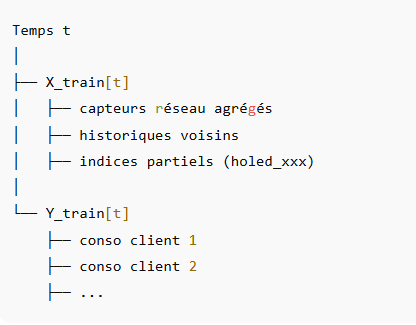


In [18]:
x_train  = pd.read_csv('data/X_train_78VdSWL.csv')
x_test = pd.read_csv('data/X_test_XKVc4no.csv')
y_train = pd.read_csv('data/y_train_u0UkKEh.csv')

print(f"X_Train shape: {x_train.shape}")
print(f"X_Test shape: {x_test.shape}")
print(f"Y_Target shape: {y_train.shape}")

X_Train shape: (1057, 21001)
X_Test shape: (1057, 38141)
Y_Target shape: (1057, 1001)


In [19]:
display(x_train.head())
display(x_test.head())
display(y_train.head())

,Horodate,5423908671,2568793410,8310762594,6235194807,423895617,193845276,216589743,218753964,1794650328,...,holed_991,holed_992,holed_993,holed_994,holed_995,holed_996,holed_997,holed_998,holed_999,holed_1000
0,2023-01-09 00:00:00,352.0,0.0,371.0,110.0,724.0,102.0,256.0,7.0,105.0,...,0.0,32.0,152.0,NaN,0.0,1099.0,117.0,45.0,253.0,186.0
1,2023-01-09 00:30:00,405.0,0.0,363.0,108.0,478.0,147.0,281.0,8.0,134.0,...,0.0,34.0,84.0,NaN,NaN,782.0,109.0,40.0,227.0,180.0
2,2023-01-09 01:00:00,599.0,0.0,352.0,93.0,832.0,155.0,295.0,5.0,96.0,...,0.0,30.0,24.0,NaN,0.0,630.0,375.0,58.0,237.0,166.0
3,2023-01-09 01:30:00,315.0,0.0,348.0,84.0,574.0,152.0,267.0,15.0,156.0,...,0.0,34.0,24.0,NaN,0.0,773.0,468.0,48.0,245.0,525.0
4,2023-01-09 02:00:00,448.0,0.0,364.0,73.0,421.0,176.0,346.0,38.0,97.0,...,0.0,30.0,46.0,NaN,0.0,879.0,534.0,41.0,175.0,372.0


,Horodate,123476859,123596487,123798654,123875946,123879645,123897645,123947865,124367958,124568973,...,holed_991,holed_992,holed_993,holed_994,holed_995,holed_996,holed_997,holed_998,holed_999,holed_1000
0,2023-01-09 00:00:00,102.0,992.0,365.0,252.0,71.0,132.0,30.0,201.0,121.0,...,38.0,168.0,32.0,NaN,445.0,NaN,NaN,767.0,2029.0,129.0
1,2023-01-09 00:30:00,89.0,996.0,351.0,219.0,47.0,140.0,31.0,173.0,186.0,...,27.0,82.0,48.0,NaN,492.0,207.0,NaN,773.0,1698.0,113.0
2,2023-01-09 01:00:00,134.0,841.0,314.0,213.0,55.0,114.0,38.0,204.0,251.0,...,37.0,102.0,44.0,NaN,461.0,218.0,NaN,613.0,1737.0,NaN
3,2023-01-09 01:30:00,130.0,961.0,228.0,253.0,35.0,103.0,35.0,176.0,305.0,...,13.0,78.0,33.0,NaN,491.0,104.0,NaN,691.0,994.0,135.0
4,2023-01-09 02:00:00,135.0,949.0,213.0,243.0,47.0,472.0,21.0,187.0,283.0,...,62.0,107.0,36.0,NaN,451.0,97.0,NaN,844.0,1044.0,NaN


,Horodate,holed_1,holed_2,holed_3,holed_4,holed_5,holed_6,holed_7,holed_8,holed_9,...,holed_991,holed_992,holed_993,holed_994,holed_995,holed_996,holed_997,holed_998,holed_999,holed_1000
0,2023-01-09 00:00:00,578.0,698.0,17.0,2.0,283.0,154.0,131.0,619.0,107.0,...,0.0,32.0,152.0,121.0,0.0,1099.0,117.0,45.0,253.0,186.0
1,2023-01-09 00:30:00,533.0,224.0,18.0,2.0,1047.0,150.0,106.0,542.0,114.0,...,0.0,34.0,84.0,107.0,0.0,782.0,109.0,40.0,227.0,180.0
2,2023-01-09 01:00:00,623.0,246.0,17.0,5.0,1185.0,131.0,74.0,517.0,109.0,...,0.0,30.0,24.0,128.0,0.0,630.0,375.0,58.0,237.0,166.0
3,2023-01-09 01:30:00,613.0,643.0,17.0,18.0,746.0,77.0,146.0,455.0,113.0,...,0.0,34.0,24.0,200.0,0.0,773.0,468.0,48.0,245.0,525.0
4,2023-01-09 02:00:00,1823.0,318.0,18.0,15.0,560.0,125.0,82.0,551.0,104.0,...,0.0,30.0,46.0,792.0,0.0,879.0,534.0,41.0,175.0,372.0


We transform the data to ensure we have time series (in our case, it’s optional)

In [20]:
for df in [x_train, x_test, y_train]:
    df["Horodate"] = pd.to_datetime(df["Horodate"])

assert (x_train["Horodate"].values == y_train["Horodate"].values).all()
print("Horodate parfaitement alignée entre X_train et Y_train")


Horodate parfaitement alignée entre X_train et Y_train


## Separation sensors/holed

In [21]:
holed_cols_x = [c for c in x_train.columns if c.startswith("holed_")]
sensor_cols = [c for c in x_train.columns if c not in holed_cols_x + ["Horodate"]]

print(f"Nombre de capteurs réseau     : {len(sensor_cols)}")
print(f"Nombre de colonnes holed dans X: {len(holed_cols_x)}")

Nombre de capteurs réseau     : 20000
Nombre de colonnes holed dans X: 1000


## Analysis of missing values

In [22]:
missing_ratio = x_train.isnull().mean().mean() * 100
print(f"Taux moyen de valeurs manquantes dans X_train : {missing_ratio:.2f}%")


Taux moyen de valeurs manquantes dans X_train : 0.59%


## Analysis of zero (0 different from NaN)

In [24]:
zero_ratio = (x_train[sensor_cols] == 0).mean().mean() * 100
print(f"Taux moyen de zéros dans les capteurs réseau : {zero_ratio:.2f}%")


Taux moyen de zéros dans les capteurs réseau : 6.67%


## Temporal feature upgraded


In [25]:
def add_time_features(df):
    df["hour"] = df["Horodate"].dt.hour
    df["weekday"] = df["Horodate"].dt.weekday
    df["month"] = df["Horodate"].dt.month
    
    # Encodage cyclique
    df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
    df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)
    
    return df

In [26]:
x_train = add_time_features(x_train)
x_test = add_time_features(x_test)


Removal Horodate

In [27]:
x_train = x_train.drop(columns=["Horodate"])
x_test = x_test.drop(columns=["Horodate"])
y_train = y_train.drop(columns=["Horodate"])


## Creation of missing data indicators

In [28]:
x_train["nb_missing"] = x_train.isnull().sum(axis=1)
x_test["nb_missing"] = x_test.isnull().sum(axis=1)

print("Exemple nombre de valeurs manquantes par ligne :")
print(x_train["nb_missing"].describe())


Exemple nombre de valeurs manquantes par ligne :
count    1057.000000
mean      123.490066
std        11.350734
min        48.000000
25%       116.000000
50%       124.000000
75%       131.000000
max       163.000000
Name: nb_missing, dtype: float64


In [29]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)


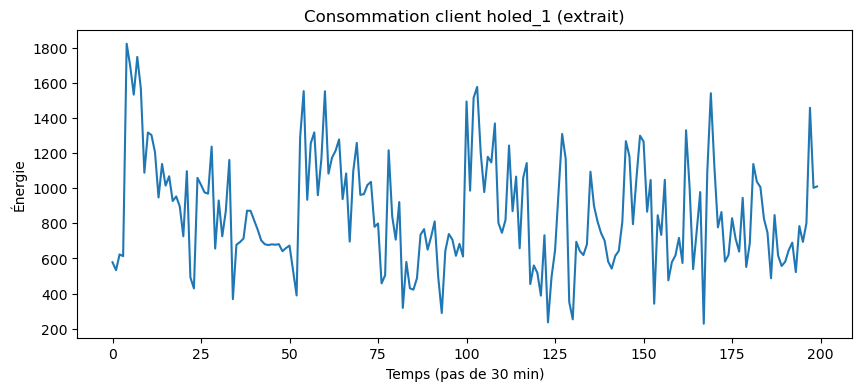

In [30]:
plt.figure(figsize=(10,4))
plt.plot(y_train.iloc[:200, 0])
plt.title("Consommation client holed_1 (extrait)")
plt.xlabel("Temps (pas de 30 min)")
plt.ylabel("Énergie")
plt.show()


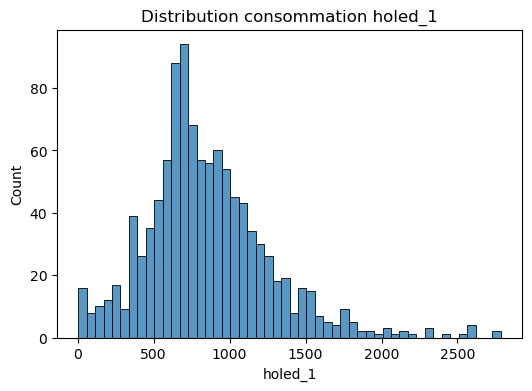

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(y_train.iloc[:, 0], bins=50)
plt.title("Distribution consommation holed_1")
plt.show()


In [32]:
corr = x_train[sensor_cols[:100]].corrwith(y_train.iloc[:, 0])
print("Top 10 capteurs les plus corrélés à holed_1")
print(corr.abs().sort_values(ascending=False).head(10))


Top 10 capteurs les plus corrélés à holed_1
1267803945    0.228485
8430576912    0.157318
2870914536    0.155855
7805236914    0.154787
6592380471    0.143139
9073285164    0.142615
6295784031    0.122636
8639751240    0.111892
9142735860    0.110930
2341857069    0.107830
dtype: float64


c:\Users\Leopo\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Leopo\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
